# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 


You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib  inline

#Compute ECDF for a one-dimensional array of measurements.
def ecdf(data):
    # Number of data points, n
    n = len(data)
    # x-data for the ECDF, x
    x = np.sort(data)
    # y-data for the ECDF, y
    y = np.arange(1, n+1) / n
    return x, y

df = pd.read_csv('data/human_body_temperature.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### Question 1
Is the distribution of body temperatures normal? 
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

CLT= Central Limit Theorem

n is 130
bin numbers are 11


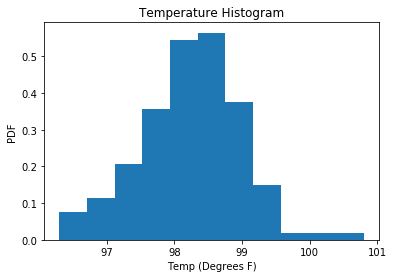

In [83]:
n=len(df.temperature)
bin_num = int(np.sqrt(n)) # is this the best way to pick bin number?
print('n is ' + str(n))
print('bin numbers are ' + str(bin_num))
df.temperature.plot(kind='hist', bins=bin_num, normed=True, title='Temperature Histogram')
plt.xlabel('Temp (Degrees F)')
plt.ylabel('PDF')

These data look approximately normal, but it will be better compare using an ECDF comparisons and a test to determine if these data are likely to come from a population of data that is normally distributed.  

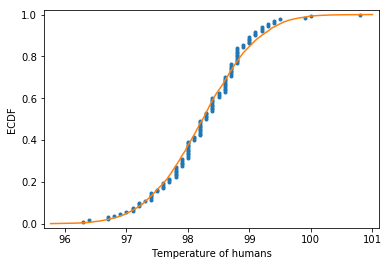

In [65]:
mean = np.mean(df['temperature']) 
std = np.std(df['temperature']) 
#collect random samples of a population with the same mean and SD as the data given
samples = np.random.normal(mean,std,size=10000 )
#compute ECDF for given data, and sampled data
x,y= ecdf(df['temperature'])
x_sample, y_sample = ecdf(samples)

plot = plt.plot (x, y, marker = '.', linestyle = 'none')
plot = plt.plot (x_sample, y_sample)

# Make everything look nicer
plot = plt.margins(0.02)
plot = plt.xlabel('Temperature of humans')
plot = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [41]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The ECDF comparison shows a simulated sample using the same mean and SD as the given data overlays very closely with the ECDF of the given data.  This is a good indicator of a normal distribution.  
The null hypothesis for the normality test is that the data come from a normal distribution.  Since p>0.05, we cannot reject the null, i.e. the data can be assumed to be normally distributed. 

 #### Question 2
 Is the sample size large? Are the observations independent?
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

The df.info() performed above indicates n=130.  This is not particularly large, but large enough for the restriction of the CLT (n>30). We are led to understand the observations are independent, since each measurement is from different individuals, and those individuals are not related in any way that would influence measurements on other individuals. 

#### Question 3
Is the true population mean really 98.6 degrees F?
    <li> Would you use a one-sample or two-sample test? Why?
    <li>In this situation, is it appropriate to use the $t$ or $z$ statistic?
    <li>Now try using the other test. How is the result be different? Why?

In [51]:
print('The mean of the data set is ' + str(np.mean(df.temperature))+'.')
print('The median of the data set is ' + str(np.median(df.temperature))+'.')

The mean of the data set is 98.24923076923078.
The median of the data set is 98.3.


The null hypothesis is that the population mean (98.6) is not different than the sample mean (96.3), given the sample data. A significant result ($p$<0.05) would reject the null, and indicate that the true population mean is not 98.6.

  <li> A one-sample test should be used because we are not comparing two groups. 
  <li> Becuase the sample size is large (enough), normally distributed, and we don't know the SD, we should use a $t$ statistic.

In [66]:
# Compute standard error
std_err = df.temperature.std()/np.sqrt(n)
# Compute T-statistic
t_value = (mean-98.6)/std_err
# Compute degrees of freedom
deg_f = n-1
# Compute the p-value associated to our test
stats.t.sf(np.abs(t_value),deg_f)*2

2.4106320415609943e-07

This $p$-value is <0.05, and we therefore reject the null hypothesis. We can then accept the alternative hypothesis, that the population mean is NOT 98.6, given the data.

We can compare this to the $z$-test as well.

In [67]:
z_value = (mean-98.6)/std_err
# Compute p-value associated to the Z-test
2*stats.norm.cdf(z_value)

4.9021570141133797e-08

The $z$-test also confirms the same conclusion, that the population mean is not 98.6. The difference in $p$-values between the $z$-test (lower) and the $t$-test (higher) is expected because the Student $t$-distribution has larger tails than the normal distribution.

#### Question 4
Draw a small sample of size 10 from the data and repeat both tests.
    <li>Which one is the correct one to use?
    <li>What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

A random sample of size 10 will have very small $n$, therefore a $t$ statistic would perform better.

In [76]:
small_sample = df.temperature.sample(n=10)

<li> $t$-test

In [81]:
mean_small = np.mean(small_sample)
print('The mean of the small data set is ' + str(mean_small))
std_err_small = small_sample.std()/np.sqrt(10)
deg_f_small = 10-1

#t test
t_value_small = (mean_small-98.6)/std_err_small
stats.t.sf(np.abs(t_value_small),deg_f_small)*2

The mean of the small data set is 98.3


0.28325639573179018

<li> $z$-test

In [82]:
#z test
z_value_small = (mean_small-98.6)/std_err_small
2*stats.norm.cdf(z_value_small)

0.25380249736669491

The $p$-values for both tests are >0.05, indicating that we can only accept the null (i.e. the mean is not different than 98.6).  

However, the $p$-value for the $z$ test is lower, meaning it is slightly less conservative.

#### Question 5
At what temperature should we consider someone's temperature to be "abnormal"?
    <li>Start by computing the margin of error and confidence interval.

An 'abnormal' temperature would be outside the confidence interval computed from the data set given.

In [87]:
#way 1
std=np.std(df.temperature)
stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))
stats.t.interval(0.95, n-1, loc=mean, scale=std/np.sqrt(n))

(98.12249318821641, 98.375968350245145)

In [92]:
#is this way the same? yes
z_crit = stats.norm.ppf(q = 0.975)
std=np.std(df.temperature)  
margin_of_error = z_crit * (std/np.sqrt(n))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)  
confidence_interval

1.95996398454
130


(98.123682111456645, 98.37477942700491)

An abnormal temperature would be below 98.1 or above 98.4.

#### Question 6
Is there a significant difference between males and females in normal temperature?
    <li>What test did you use and why?
    <li>Write a story with your conclusion in the context of the original problem.

We will evaluate whether the null hypothesis that the mean for females and the mean for males are equal.  If rejected, we can conlude the population means are different.

The appropriate test to use will be a two-group $t$ test, becuase we are comparing two groups and do not know the population variance.

In [95]:
#calculate sample statistics
mean_male = df.temperature[df.gender=='M'].mean()
mean_female = df.temperature[df.gender=='F'].mean()
print('The mean male body temperature is ' + str(mean_male))
print('The mean female body temperature is ' + str(mean_female))

std_male = np.std(df.temperature[df.gender=='M'])
std_female = np.std(df.temperature[df.gender=='F'])

The mean male body temperature is 98.1046153846154
The mean female body temperature is 98.39384615384613


In [94]:
stats.ttest_ind(df.temperature[df.gender=='M'],df.temperature[df.gender=='F'],equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

This $p$-value indicates we can reject the null hypothesis that the means are equal for each gender. Instead, we can conclude that male and female groups have different mean body temperature.

Although the original study by Wunderlich (1868) reports one single value for the mean body temperature of the human population, we have found, given the data, this mean is incorrect, and that females and males actually have statistically different mean body temperatures.  It should also be noted that while these groups are different, the difference is only 0.3 degrees F, which may not be that important in a diagnostic setting.